# Visualize 3D Points (Parabolic data)
This notebook uses 3D plots to visualize 3D points. Reads measurement data from a csv file.

In [1]:
%matplotlib notebook
##%matplotlib inline
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
import numpy as np
from filter.kalman import Kalman3D

fmt = lambda x: "%9.3f" % x
np.set_printoptions(formatter={'float_kind':fmt})

## Read from csv file
import pandas as pd


## Read and Prepare Data
Read ball tracking position data from saved CSV file and prepare mx,my,mz. The file should have dT values along with X,Y,Z values.

We use these as measurements and use Kalman3D tracker to track the ball. Once we exhaust all measurements, we use Kalman3D to predict rest of the trajectory.
*Note*: The position data that we are using is in millimeters and milliseconds. However, the Kalman3D tracker uses all values in meters and seconds. We have do to this conversion here.

In [2]:
# File containing 3D points predicted and measured. Last column with time passage will be ignored
SYNTH = False

if SYNTH:
    data_ = pd.read_csv('data/datafile_parabolic.csv')  ## Synthetic data
else:
    data_ = pd.read_csv('data/input_positions_3.csv')  ## Real data
print(data_.keys())
data = data_/1000.
_mx = np.float32(data['mx'])
_my = np.float32(data['my'])
_mz = np.float32(data['mz'])
if SYNTH:
    ## Drop useless data
    mx = _mx[0:19]
    my = _my[0:19]
    mz = _mz[0:19]
else:
    mx = _mx
    my = _my
    mz = _mz
print("mx: {} {}".format(mx.shape, mx))
print("my: {} {}".format(my.shape, my))
print("mz: {} {}".format(mz.shape, mz))

def getpos(i, x,y,z):
    return(np.float32([x[i],y[i],z[i]]))

Index(['mx', 'my', 'mz'], dtype='object')
mx: (29,) [    1.431     1.424     1.417     1.407     1.402     1.384     1.381
     1.372     1.362     1.358     1.349     1.345     1.338     1.327
     1.325     1.316     1.314     1.304     1.296     1.291     1.283
     1.273     1.267     1.261     1.253     1.244     1.239     1.233
     1.224]
my: (29,) [    0.430     0.472     0.513     0.549     0.586     0.650     0.684
     0.715     0.745     0.768     0.789     0.811     0.825     0.848
     0.864     0.880     0.893     0.900     0.900     0.913     0.919
     0.927     0.931     0.934     0.937     0.927     0.926     0.926
     0.917]
mz: (29,) [    4.151     4.282     4.406     4.550     4.681     4.946     5.083
     5.202     5.331     5.465     5.594     5.721     5.859     5.976
     6.106     6.220     6.339     6.481     6.628     6.737     6.861
     6.976     7.095     7.218     7.332     7.488     7.595     7.706
     7.834]


In [3]:
mx

array([    1.431,     1.424,     1.417,     1.407,     1.402,     1.384,
           1.381,     1.372,     1.362,     1.358,     1.349,     1.345,
           1.338,     1.327,     1.325,     1.316,     1.314,     1.304,
           1.296,     1.291,     1.283,     1.273,     1.267,     1.261,
           1.253,     1.244,     1.239,     1.233,     1.224],
      dtype=float32)

## Track and Predict
Now we use our Kalman3D tracker to  track the position of the ball based on measured data and then predict the trajectory when all measurement data is exhausted.

In [4]:
fps = 100.
dT  = (1 / fps)
print("dT: {:f}".format(dT))
KF = Kalman3D(drg=1.0, dbg=0)
pred = KF.init(getpos(0,mx,my,mz))
print("pred: {}".format(pred))
##-#######################################################################################
## Tracking
## Since we are doing all operations in zero time, specify dT manually (e.g., 0.033 sec)
px = np.float32([pred[0]])
py = np.float32([pred[1]])
pz = np.float32([pred[2]])
for i in range(len(mx)-1):
    pred = KF.track(getpos([i+1], mx, my, mz), dT)
    px = np.append(px, pred[0])
    py = np.append(py, pred[1])
    pz = np.append(pz, pred[2])
    print("  tracked position : {}".format(pred*1000))

##-#######################################################################################
## Trajectory prediction
## Since we are doing all operations in zero time, specify dT manually (e.g., 0.033 sec)
for ii in range(15):
    pred = KF.predict(dT)   # Use last value of dT for all predictions
    px = np.append(px, pred[0])
    py = np.append(py, pred[1])
    pz = np.append(pz, pred[2])
    print("predicted position : {}".format(pred*1000))

dT: 0.010000
pred: [    1.431     0.430     4.151]
  tracked position : [ 1429.714   442.714  4189.143]
  tracked position : [ 1425.120   471.396  4278.191]
  tracked position : [ 1417.502   505.861  4401.273]
  tracked position : [ 1410.771   542.338  4532.719]
  tracked position : [ 1398.548   592.156  4730.136]
  tracked position : [ 1390.440   635.028  4902.886]
  tracked position : [ 1381.709   672.708  5053.579]
  tracked position : [ 1372.141   707.147  5197.214]
  tracked position : [ 1365.022   736.481  5339.557]
  tracked position : [ 1356.791   762.105  5478.817]
  tracked position : [ 1350.411   786.236  5615.423]
  tracked position : [ 1343.558   805.635  5755.973]
  tracked position : [ 1334.472   826.947  5888.173]
  tracked position : [ 1328.659   845.829  6022.211]
  tracked position : [ 1321.131   863.407  6149.140]
  tracked position : [ 1316.185   878.791  6274.603]
  tracked position : [ 1308.629   889.998  6410.663]
  tracked position : [ 1300.682   895.459  6554.

In [4]:
x, y, z = 10, 10 ,10

In [8]:
x, y, z = 5, 8 ,2

In [15]:
x, y, z = 53, 18 ,12

In [6]:
fps = 100.
dT  = (1 / fps)
print("dT: {:f}".format(dT))
KF = Kalman3D(drg=1.0, dbg=0)
pred = KF.init(np.float32([x,y,z]))

dT: 0.010000


In [34]:
print("predicted position : {}".format(pred))

predicted position : [   30.803    13.640     9.870]


In [16]:
pred = KF.track(np.float32([x,y,z]), dT)

In [33]:
pred = KF.predict(dT)

In [23]:
sum = 0
tm  = np.zeros(len(px))
for i in range(len(tm)):
    sum += dT
    tm[i] = sum

## Convert mx also back to millimeters.
px = px * 1000.
py = py * 1000.
pz = pz * 1000.
nmx = mx * 1000.
nmy = my * 1000.
nmz = mz * 1000.
ntm = tm * 1000.
##-#######################################################################################
## Everything is in millimeters and milliseconds now
##-#######################################################################################
print("px size", px.shape)
print("tm size", tm.shape)

## Visualize X, Y, and Z individually
## In the plot below, we visualize the pairs of px, mx; py, my and pz, mz to see how they relate to each other
print("PX, MX")
fig1a = plt.figure()
plt.plot(tm, px)
plt.plot(tm[0:len(nmx)], nmx)
plt.legend('PM', ncol=1, loc='upper left')

print("PY, MY")
fig1b = plt.figure()
plt.plot(tm, py)
plt.plot(tm[0:len(nmy)], nmy)
plt.legend('PM', ncol=1, loc='upper left')

print("PZ, MZ")
fig1c = plt.figure()
plt.plot(tm, pz)
plt.plot(tm[0:len(nmz)], nmz)
plt.legend('PM', ncol=1, loc='upper left')

NameError: name 'px' is not defined

## Visualize (X,Y,Z) of Predicted and Measured in Points in 3D
In the plot below, we visualize all the predicted and measured points in 3D. This gives a more realistic view of how the predicted points are related to the measured points.

<IPython.core.display.Javascript object>


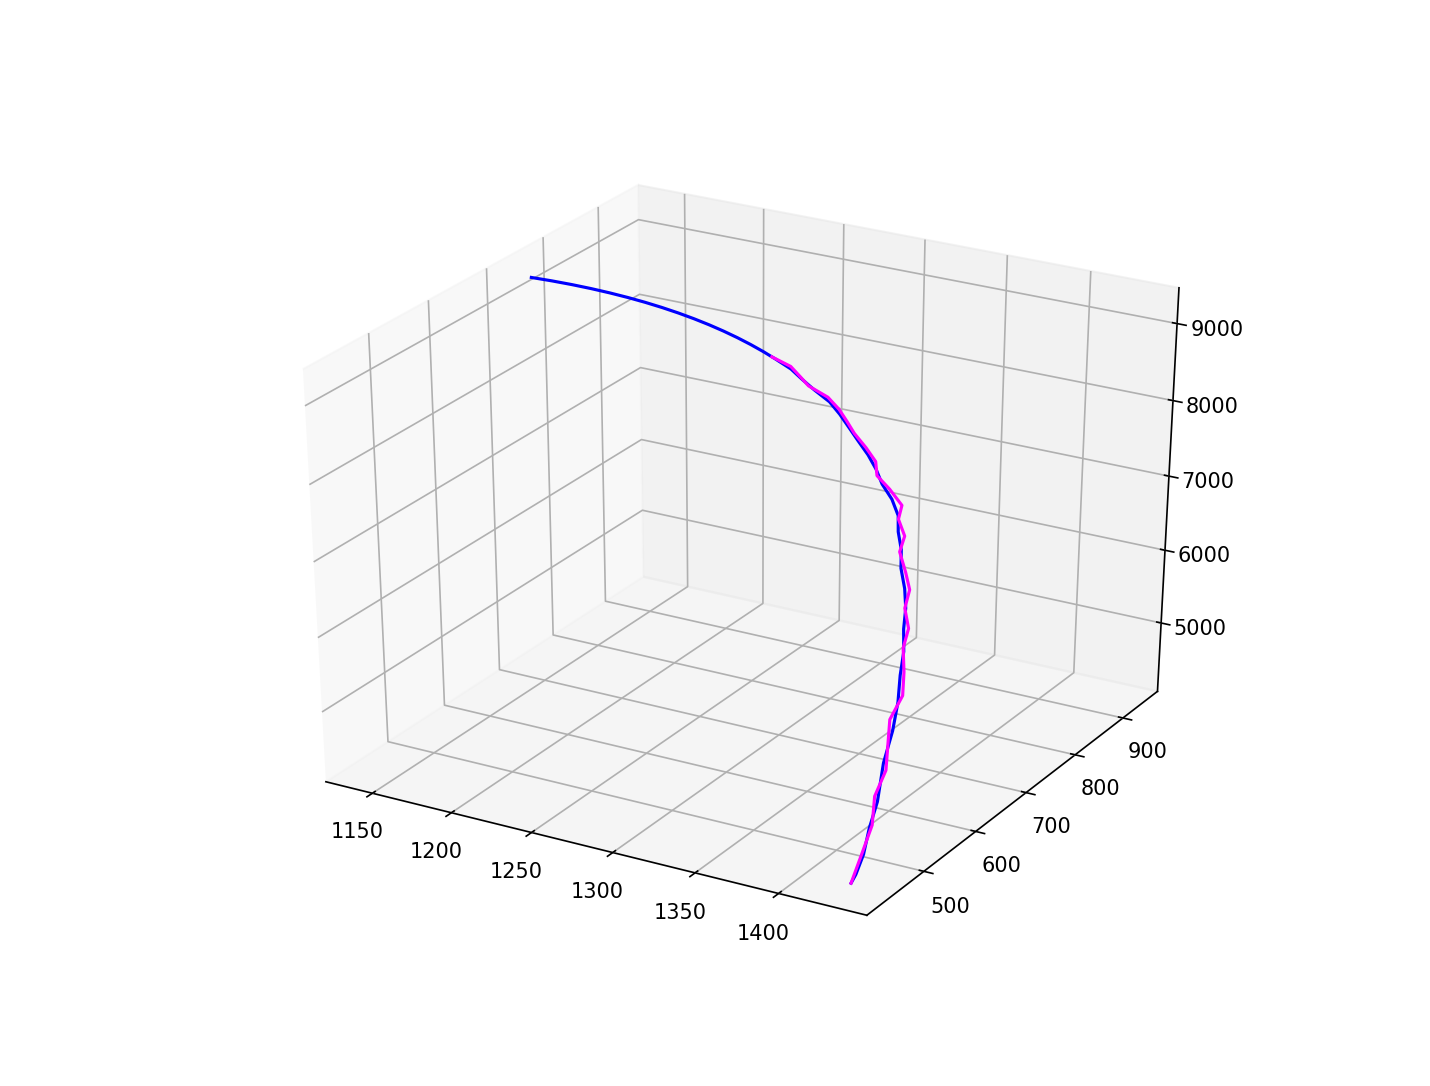

In [6]:
fig2 = plt.figure()
ax = plt.axes(projection='3d')
#ax.set_xlim3d(-2000,2000)
#ax.set_ylim3d(-2000,2000)
#ax.set_zlim3d(-2000,2000)

if 0: ## Plot axis or not
    st = [0,0,0]
    xx = [200,   0,   0]
    yy = [  0, 200,   0]
    zz  =[  0,   0, 200]
    for i in range(len(st)):
        ax.plot([st[i], xx[i]], [st[i],yy[i]],zs=[st[i],zz[i]])

ax.plot3D(px, py, pz, 'blue')
ax.plot3D(nmx, nmy, nmz, 'magenta')


In [9]:



class Kalman_filiter():

    def __init__(self, x_init, y_init, z_init, dT):
        self.KF = Kalman3D(drg=0.507, dbg=4)

        self.dT = dT

        self.pred = self.KF.init(np.float32([x_init, y_init, z_init]))



    def update(self, x, y, z, dT):

        self.dT = dT
        self.pred = self.KF.track(np.float32([x, y, z]), self.dT)


    def get_predict(self, dT):
        self.pred = self.KF.predict(dT)




In [10]:
x,y,z = [-7.923465928004007, -0.6755867599611189, 2.580941671512611]

In [11]:
a = Kalman_filiter(x,y,z,0.04)
print(a.pred)

nstates 7
transitionMatrix: shape:(7, 7)
[[    1.000     0.000     0.000     0.000     0.000     0.000     0.000]
 [    0.000     1.000     0.000     0.000     0.000     0.000     0.000]
 [    0.000     0.000     1.000     0.000     0.000     0.000     0.000]
 [    0.000     0.000     0.000     0.507     0.000     0.000     0.000]
 [    0.000     0.000     0.000     0.000     0.507     0.000     0.000]
 [    0.000     0.000     0.000     0.000     0.000     0.507     0.000]
 [    0.000     0.000     0.000     0.000     0.000     0.000     1.000]]
measurementMatrix: shape:(3, 7)
[[    1.000     0.000     0.000     0.000     0.000     0.000     0.000]
 [    0.000     1.000     0.000     0.000     0.000     0.000     0.000]
 [    0.000     0.000     1.000     0.000     0.000     0.000     0.000]]
processNoiseCov: shape:(7, 7)
[[    0.100     0.000     0.000     0.000     0.000     0.000     0.000]
 [    0.000     0.100     0.000     0.000     0.000     0.000     0.000]
 [    0.000     0.0

In [13]:
a.update(x,y,z,0.04)

print(a.pred)

a.get_predict(0.04)
print(a.pred)


dT: 0.0400
---------------------------------------------------
meas current               : [   -5.810    -0.418     2.328]
pred predicted             : [   -5.965    -0.436     2.346]

[   -5.965    -0.436     2.346]
dT: 0.0400
---------------------------------------------------
meas current               : None (only predicting)
pred predicted without meas: [   -5.836    -0.434     2.333]

[   -5.836    -0.434     2.333]


In [12]:
x,y,z = [-5.810376800248608, -0.4175195849390212, 2.3275454429899285]

In [8]:
a.KF.measNoise

AttributeError: 'Kalman3D' object has no attribute 'measNoise'

In [44]:
'''
Created on May 13, 2019

@author: maheriya
'''

import argparse
import numpy as np
import cv2 as cv
import sys

if sys.version_info[0] != 3:
    print("This module requires Python 3")
    sys.exit(1)


class Kalman3D:
    '''
    Kalman3D: Kalman filter to track a 3D point (x,y,z)
    All X Y Z should be in meters -- NOT in millimeters
    '''
    global debug, drag, grav, procNoise, measNoise
    ##-#######################################################################################    
    ## User-level Properties that can be changed for tuning
    ##-#######################################################################################    
    drag      = 0    # Drag felt by all axes (for example, air resistance)
    grav      = 9.801  # The constant acceleration on Y-axis
    procNoise = 0    # Process noise -- how good is our model?
    # 0.8: More uncertainty => more weight to prediction  (trust the model more)
    # 0.1: Less uncertainty => more weight to measurement (trust the measurement more)
    measNoise = 0   # Measurement noise: How good is the tracking?
    ##-#######################################################################################    



    ##-#######################################################################################    
    ## Properties that don't need to be changed for tuning
    global nstates, nmeasures, kf
    global SPX, SPY, SPZ, SVX, SVY, SVZ, SAC, MPX, MPY, MPZ
    global TDTX, TDTY, TDTZ, TDT2PX, TDT2PY, TDT2PZ, TDTVX, TDTVY, TDTVZ

    nstates   = 7 # px, py, pd, vx, vy, vd ay(6x6 matrix)
    nmeasures = 3 # All position data (p*), no velocities (v*)
    kf        = cv.KalmanFilter(nstates, nmeasures, 0)
    # State variable indices
    SPX = 0
    SPY = 1
    SPZ = 2
    SVX = 3
    SVY = 4
    SVZ = 5
    SAC = 6 # the constant acceleration; make sure to initialize it to a constant
    # Measurement variable indices
    MPX = 0
    MPY = 1
    MPZ = 2


    def __init__(self, drg=1.0, dbg=0):
        '''
        Params:
        drag: Drag coefficient. Use this to introduce drag. This is only an approximation
        '''
        global debug, drag
        drag           = drg
        debug          = dbg

        self.ticks     = 0     # keep track of time since last update (for dT)
        self.lastTicks = 0     # 
        if debug>=2: print("nstates", nstates)
        
        # A: Transition State Matrix -- the dynamics (constant acceleration model)
        # dT will be updated at each time stamp (could be fixed to; we are not using fixed dT)
        #    [PX   PY   PD   VX   VY   VD  AC  ]
        # px [ 1    0    0   dT    0    0 .5d2 ] (.5d2 --> 0.5 * dT**2)
        # py [ 0    1    0    0   dT    0 .5d2 ]
        # pd [ 0    0    1    0    0   dT .5d2 ]
        # vx [ 0    0    0   Drg   0    0   dT ]
        # vy [ 0    0    0    0   Drg   0   dT ]
        # vd [ 0    0    0    0    0   Drg  dT ]
        # ac [ 0    0    0    0    0    0   1  ]
        kf.transitionMatrix = np.eye(nstates, dtype=np.float32)
        kf.transitionMatrix[SVX, SVX] = drag
        kf.transitionMatrix[SVY, SVY] = drag
        kf.transitionMatrix[SVZ, SVZ] = drag
        if debug>=3: print("transitionMatrix: shape:{}\n{}".format(kf.transitionMatrix.shape, kf.transitionMatrix))

        # H: Measurement Matrix
        # [ 1 0 0 0 0 0 0] X
        # [ 0 1 0 0 0 0 0] Y
        # [ 0 0 1 0 0 0 0] D
        kf.measurementMatrix = np.eye(nmeasures, nstates, dtype=np.float32)
        if debug>=3: print("measurementMatrix: shape:{}\n{}".format(kf.measurementMatrix.shape, kf.measurementMatrix))
 
 
        # Q: Process Noise Covariance Matrix
        # [ Epx 0   0   0   0   0   0   ]
        # [ 0   Epy 0   0   0   0   0   ]
        # [ 0   0   Epd 0   0   0   0   ]
        # [ 0   0   0   Evx 0   0   0   ]
        # [ 0   0   0   0   Evy 0   0   ]
        # [ 0   0   0   0   0   Evd 0   ]
        # [ 0   0   0   0   0   0   Eac ]
        kf.processNoiseCov = np.eye(nstates, dtype=np.float32)*procNoise
        # Override errors for velocities (rely more on measurement for velocity rather than our model)
        kf.processNoiseCov[SVX, SVX] = 8.0;
        kf.processNoiseCov[SVY, SVY] = 8.0;
        kf.processNoiseCov[SVZ, SVZ] = 8.0;
        if debug>=3: print("processNoiseCov: shape:{}\n{}".format(kf.processNoiseCov.shape, kf.processNoiseCov))
        
        # R: Measurement Noise Covariance Matrix
        kf.measurementNoiseCov = np.eye(nmeasures, dtype=np.float32)*measNoise
        if debug>=3: print("measurementNoiseCov: shape:{}\n{}".format(kf.measurementNoiseCov.shape, kf.measurementNoiseCov))


    ## Public method 1/3
    def init(self, meas=np.float32([0,0,0])):
        '''
        Initialize the filter initial state
        Kalman filter actually doesn't have an init method. We just our hack our way through it.
        Call this init() before calling any other function of this class
        '''

        ## Initialize the filter (the Kalman Filter actually doesn't have any real method to initialize; we hack)
        state = np.zeros(kf.statePost.shape, np.float32)
        state[SPX] = meas[SPX];
        state[SPY] = meas[SPY];
        state[SPZ] = meas[SPZ];
        state[SVX] = 0.1;
        state[SVY] = 0.1;
        state[SVZ] = 0.1;
        state[SAC] = grav;
        kf.statePost = state;
        kf.statePre  = state;
        if debug>=2: print("statePost: shape:{}\n{}".format(kf.statePost.shape, kf.statePost))
        
        self.lastTicks = self.ticks;
        self.ticks = cv.getTickCount();
        return meas

    ## Public method 2/3
    ##-########################################################################################
    ## This is a convenience function that can be called every time a measurement
    ## is available or every time prediction is require based on past values.
    ##
    ##
    ## meas     : Measured 3D point
    ## onlyPred : Flag to ignore meas input (e.g., when input is not available)
    ## ret val  : Output predicted 3D point
    ##-########################################################################################
    def track(self, meas, dT=-1., onlyPred=False):
        '''
        User level function to do the tracking.
        meas: measurement data (ball position)
        Returns currently predicted (filtered) position of the ball
        '''
        if (onlyPred): ## only predict; ignore meas
            # This will be useful when there are no predictions available or
            # to predict future trajectory based on past measurements
            pred = self.Kpredict(dT)            # get predictions
            cpred = self.Kcorrect(pred, False)  # update with predicted values (restart means used pred value for correction 100% weight)
            if debug>=1:
                print("---------------------------------------------------")
                print("meas current               : None (only predicting)")
                print("pred predicted without meas: {}\n".format(cpred))
        else: # use meas to correct prediction
            pred = self.Kpredict(dT)           # get predictions
            cpred = self.Kcorrect(meas, False) # Kalman correct with measurement
            if debug>=1:
                print("---------------------------------------------------")
                print("meas current               : {}".format(meas))
                print("pred predicted             : {}\n".format(cpred))

        return cpred


    ## Public method 3/3
    ##-#######################################################################################
    ## Another convenience function that can be called to make predictions without
    ## measurements. Should only be used when measurement is not available.
    ## If measurement is available, use track() function which provides predicted value while
    ## updating the tracking state.
    ##
    ##
    ## pred: Output predicted 3D point
    ##-#######################################################################################
    def predict(self, dT=-1.):
        '''
        User level convenience function to do the prediction of trajectory.
        Returns predicted position
        '''
        return self.track(meas=None, dT=dT, onlyPred=True)


    ##-#######################################################################################
    ## Private methods
    def Kpredict(self, dT=-1.):
        '''
        Get predicted state. Each mat is a 3D point
        '''
        if (dT <= 0):
            self.lastTicks = self.ticks
            self.ticks = cv.getTickCount();
            dT = 1.0 * (self.ticks - self.lastTicks) / cv.getTickFrequency(); ## seconds

        if debug>=2: print("dT: {:1.4f}".format(dT))
        # Update the transition Matrix A with dT for this time stamp
        kf.transitionMatrix[SPX, SVX] = dT;
        kf.transitionMatrix[SPY, SVY] = dT;
        kf.transitionMatrix[SPZ, SVZ] = dT;
    
        #kf.transitionMatrix[SVX, SAC] = -dT;
        kf.transitionMatrix[SVZ, SAC] = -dT;
        #kf.transitionMatrix[SVZ, SAC] = -dT;
        kf.transitionMatrix[SAC, SAC] = 1.;

        pred = kf.predict()
        return np.float32([pred[SPX], pred[SPY], pred[SPZ]]).squeeze()


    def Kcorrect(self, meas, restart=False):
        '''
        State correction using measurement matrix with 3D points
        '''
        if (restart): # Restart the filter
            # Initialization
            cv.setIdentity(kf.errorCovPre, 1.0);

            # Force the measurement to be used with 100% weight ignoring Hx
            kf.statePost[SPX] = meas[SPX];
            kf.statePost[SPY] = meas[SPY];
            kf.statePost[SPZ] = meas[SPZ];
            kf.statePost[SVX] = 3.;
            kf.statePost[SVY] = 3.;
            kf.statePost[SVZ] = 3.;
            kf.statePost[SAC] = grav;
        else:
            kf.correct(meas); # Kalman Correction
        return np.float32([kf.statePost[SPX], kf.statePost[SPY], kf.statePost[SPZ]]).squeeze()


    def getPostState(self):
        '''
        Get the state after correction
        '''
        return np.float32([kf.statePost[SPX], kf.statePost[SPY], kf.statePost[SPZ]]).squeeze()


#endclass
        
    

In [45]:
class Kalman_filiter():

    def __init__(self, x_init, y_init, z_init, dT):
        self.KF = Kalman3D(drg=1, dbg=2)

        #self.dT = dT
        self.dT = 1/25

        self.pred = self.KF.init(np.float32([x_init, y_init, z_init]))

    def update(self, x, y, z, dT):

        self.dT = dT
        self.dT = 1/25

        print("x, y, z : ", x, y, z)
        self.pred = self.KF.track(np.float32([x, y, z]), self.dT )

    def predict(self, dT):

        self.dT = 1/25

        self.pred = self.KF.predict(dT)


    def get_predict(self):
        return self.pred

In [46]:
x, y ,z = [-8.211298346073638, 1.1302960774824564, 2.4217032128542315]
a = Kalman_filiter(x,y,z, 1/25)
a.get_predict()

x, y ,z = [-7.501178178734268, 1.064055756178849, 2.514415127791024]
a.update(x,y,z, 1/25)
a.get_predict()


a.predict(1/25)
a.get_predict()

nstates 7
statePost: shape:(7, 1)
[[-8.211298 ]
 [ 1.1302961]
 [ 2.421703 ]
 [ 0.1      ]
 [ 0.1      ]
 [ 0.1      ]
 [ 9.801    ]]
x, y, z :  -7.501178178734268 1.064055756178849 2.514415127791024
dT: 0.0400
---------------------------------------------------
meas current               : [-7.5011783  1.0640558  2.514415 ]
pred predicted             : [-8.207298   1.1342961  2.425703 ]

dT: 0.0400
---------------------------------------------------
meas current               : None (only predicting)
pred predicted without meas: [-8.203299   1.138296   2.4140215]



array([-8.203299 ,  1.138296 ,  2.4140215], dtype=float32)

In [43]:
for i in range(10):
    x, y ,z = [-8.211298346073638, 1.1302960774824564, 2.4217032128542315]
    a = Kalman_filiter(x,y,z, 1/25)
    a.get_predict()

    x, y ,z = [-7.501178178734268, 1.064055756178849, 2.514415127791024]
    a.update(x,y,z, 1/25)
    a.get_predict()


    a.predict(1/25)
    a.get_predict()

nstates 7
statePost: shape:(7, 1)
[[-8.211298 ]
 [ 1.1302961]
 [ 2.421703 ]
 [ 0.1      ]
 [ 0.1      ]
 [ 0.1      ]
 [ 9.801    ]]
x, y, z :  -7.501178178734268 1.064055756178849 2.514415127791024
dT: 0.0400
---------------------------------------------------
meas current               : [-7.5011783  1.0640558  2.514415 ]
pred predicted             : [-7.5011783  1.0640558  2.514415 ]

dT: 0.0400
---------------------------------------------------
meas current               : None (only predicting)
pred predicted without meas: [-6.791058    0.99781555  2.5914454 ]

nstates 7
statePost: shape:(7, 1)
[[-8.211298 ]
 [ 1.1302961]
 [ 2.421703 ]
 [ 0.1      ]
 [ 0.1      ]
 [ 0.1      ]
 [ 9.801    ]]
x, y, z :  -7.501178178734268 1.064055756178849 2.514415127791024
dT: 0.0400
---------------------------------------------------
meas current               : [-7.5011783  1.0640558  2.514415 ]
pred predicted             : [-7.5011783  1.0640558  2.514415 ]

dT: 0.0400
------------------------